<a href="https://colab.research.google.com/github/MartinekV/DL-for-bio-course/blob/master/01_Linear_regression_ADVANCED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch basics

## Model

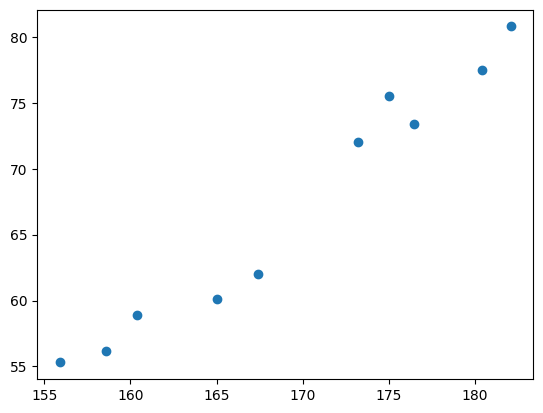

In [ ]:
from matplotlib import pyplot as plt

height = [167.4, 182.1, 175.0, 155.9, 160.4, 180.4, 173.2, 165.0, 158.6, 176.5]
bodyweight = [62.0, 80.8, 75.5, 55.3, 58.9, 77.5, 72.0, 60.1, 56.2, 73.4]
plt.scatter(height,bodyweight)

In [ ]:
import torch.nn as nn
import torch

model = nn.Linear(in_features=1, out_features=1, bias=True)

print(model.weight)
print(model.bias)

Parameter containing:
tensor([[-0.4368]], requires_grad=True)
Parameter containing:
tensor([-0.2501], requires_grad=True)


In [ ]:
# Turning Shape 10 into Shape 10x1
height_tensor = torch.tensor(height).reshape(-1,1)

# Running through the layer, broadcasting
preds = model.forward(height_tensor)
print(preds)

tensor([[-73.3733],
        [-79.7945],
        [-76.6931],
        [-68.3499],
        [-70.3156],
        [-79.0519],
        [-75.9069],
        [-72.3250],
        [-69.5293],
        [-77.3484]], grad_fn=<AddmmBackward0>)


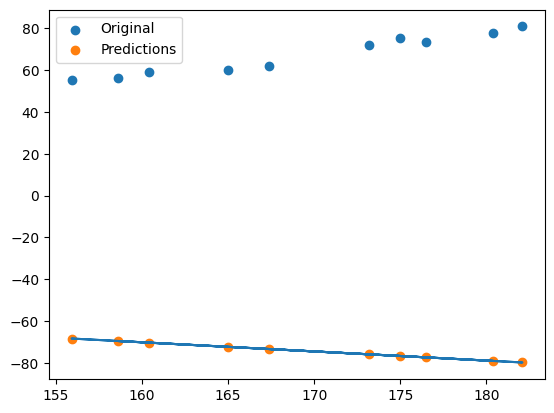

In [ ]:
plt.scatter(height, bodyweight, label='Original')
plt.scatter(height, preds.tolist(), label='Predictions')
plt.plot(height, preds.tolist())
plt.legend()

In [ ]:
x = torch.tensor(height).reshape(-1,1) #Shape 10x1
y = torch.tensor(bodyweight).reshape(-1,1) #Shape 10x1

## Learning

In [ ]:
loss_fn = nn.MSELoss()

print(loss_fn(preds, y)) #takes model output and target
print(loss_fn(y,y))

tensor(3655.5989, grad_fn=<MseLossBackward0>)
tensor(0.)


In [ ]:
loss = loss_fn(preds,y)
loss.backward() # Computing gradients and storing it next to parameters

print(model.weight)
print(model.weight.grad)

Parameter containing:
tensor([[0.0448]], requires_grad=True)
tensor([[-20427.0938]])


In [ ]:
opt = torch.optim.SGD(model.parameters(), lr=1e-5) # lr is Learning rate

opt.step() # Using the gradient of parameters to change them
opt.zero_grad()

print(model.weight)
print(model.weight.grad)

Parameter containing:
tensor([[0.0448]], requires_grad=True)
None


In [ ]:
preds = model.forward(x) # Using the model after updating parameters
loss = loss_fn(preds, y)

print(loss)

tensor(3655.5989, grad_fn=<MseLossBackward0>)


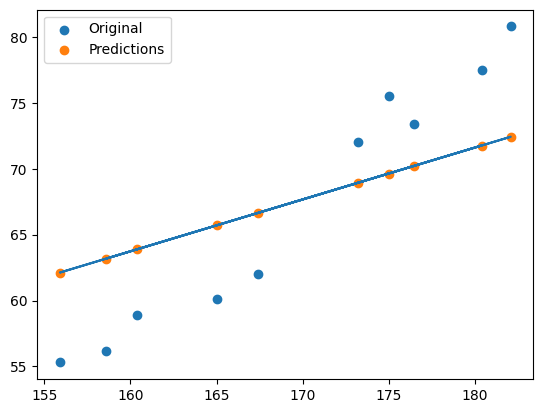

In [ ]:
plt.scatter(x.tolist(), y.tolist(), label='Original')
plt.scatter(x.tolist(), preds.tolist(), label='Predictions')
plt.plot(x.tolist(), preds.tolist())
plt.legend()

# Full solution

In [ ]:
import torch.nn as nn
import torch

model = nn.Linear(in_features=1, out_features=1, bias=True) # Model
opt = torch.optim.SGD(model.parameters(), lr=1e-5) # Optimizer
loss_fn = nn.MSELoss() # Loss function

#Data
x = torch.tensor([167.4, 182.1, 175.0, 155.9, 160.4, 180.4, 173.2, 165.0, 158.6, 176.5]).reshape(-1,1)
y = torch.tensor([62.0, 80.8, 75.5, 55.3, 58.9, 77.5, 72.0, 60.1, 56.2, 73.4]).reshape(-1,1)

print('Input shape', x.shape)
print('Label shape', y.shape)

# Training
num_epochs = 100000
# Repeat for given number of epochs
for epoch in range(num_epochs):

    # 1. Generate predictions
    pred = model(x)

    # 2. Calculate loss
    loss = loss_fn(pred, y)

    # 3. Compute gradients
    loss.backward()

    # 4. Update parameters using gradients
    opt.step()

    # 5. Reset the gradients to zero
    opt.zero_grad()

    # Optional: Uncomment to log loss during training
    log_interval = 10000
    if(epoch%log_interval == 0):
      print(f'Epoch {epoch} loss:',loss.item())

print('Training done')

Input shape torch.Size([10, 1])
Label shape torch.Size([10, 1])
Epoch 0 loss: 5168.8466796875
Epoch 10000 loss: 32.9721565246582
Epoch 20000 loss: 32.93955993652344
Epoch 30000 loss: 32.90712356567383
Epoch 40000 loss: 32.874916076660156
Epoch 50000 loss: 32.84270477294922
Epoch 60000 loss: 32.81035614013672
Epoch 70000 loss: 32.778018951416016
Epoch 80000 loss: 32.74580001831055
Epoch 90000 loss: 32.713680267333984
Training done


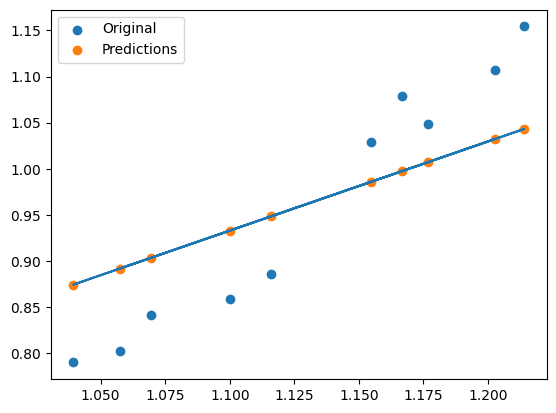

Weight 0.9663324952125549
Bias -0.12999162077903748
Loss 0.005643355660140514


In [ ]:
from matplotlib import pyplot as plt
import numpy as np

preds = model(x)
plt.scatter(x.tolist(),y.tolist(), label='Original')
plt.scatter(x.tolist(),preds.tolist() , label='Predictions')
plt.plot(x.tolist(),preds.tolist())
plt.legend()
plt.show()

print('Weight', model.weight.item())
print('Bias', model.bias.item())
print('Loss', loss_fn(model(x), y).item())

In [ ]:
# Exercise
# - Explore which hyperparameters work the best (Number of epochs, Learning rate)
# - Could we change something else than the model to improve?

In [ ]:
new_X = torch.tensor([130.5]) # Predicting a new data point
model(new_X)

tensor([125.9764], grad_fn=<AddBackward0>)